# Normas
## Explicacion Matematica

### Antecedente geometrico

Desde la grecia antigua se tenia la distancia euclideana la cual se define como 

$$
d(x,y) = \sqrt{ (x_1 - y_1)^2 + (x_2 - y_2)^2 + \dots + (x_n - y_n)^2 }
$$

Esto es consistente con el teorema de pitagoras de su momento

### Espacios vectoriales

En el siglo XIX se forma la teoria de espacios vectoriales, y se empiezan a estudiar a los vectores como elementos algebraicos, así aparecio la norma euclideana, que mide la longitud de un vector respecto al origen.

$$
 ||x||_2 = \sqrt{\sum_{i=1}^n x_i^2}
$$

### Casos especificos

Se investigan problemas con restricciones en cuanto a la longitud, como el caso de solo moverse de forma horizontal y vertical, ademas de identificar el valor maximo de los componentes para temas de administración de errores

$$
||x||_1 = \sum_{i=1}^n ||x_i||    
$$

$$
||x||_\infty = max|x_i|
$$

### Espacio de funciones

A principios del siglo XX se dieron cuenta que mucha ideas de algebra lineal se podian extender a espacios de funciones por lo que surgio la necesidad de normas mas flexibles para medir el tamaño de funciones. Nace la familia $L^p$

$$
||x_p|| = (\sum_{i=1}^n |x_i|^p)^{1/p}
$$

### Formalización de normas

Para poder tabajar con cualquier espacio vectorial se requiere una formalización.

1- Positividad y definitud positiva

* Se mide el tamaño por lo que no puede ser negativa

* El unico vector que debe tener tamaño 0 debe ser el vector 0

$$
||x|| \geq 0
$$
$$
||x|| = 0 \iff x=0
$$

2- Homogeneidad

* Es natural que si estiras el vector su magnitud se estira igual
* Si duplicas un vector su tamaño debe duplicarse igual

$$
||\alpha x =  ||\alpha ||x||
$$

3. Desigualdad triangular

* Que es una traducción de la distancia entre dos puntos directos siempre es menor o igual que ir dando un rode.

$$
||x+y|| \leq ||x|| + ||y||
$$

# Ejemplo practico: Proceso matemático de K-means

### 1. Definición inicial

Dado un conjunto de puntos $(X = x_1, x_2, \dots, x_n)$ en $(\mathbb{R}^d)$, queremos agruparlos en $k$ clusters.  
Cada cluster tendrá un **centroide** $(c_j \in \mathbb{R}^d)$, que representa el "centro" de ese cluster.


### 2. Inicialización de centroides

Se eligen $k$ centroides iniciales al azar.  
Al inicio, los centroides son simplemente puntos seleccionados de $X$.


### 3. Asignación de puntos a clusters

Cada punto $x_i$ se asigna al cluster cuyo centroide está **más cerca**.  
La distancia entre el punto $x_i$ y el centroide $c_j$ se calcula con alguna **norma**:

- Euclidiana (L2):
$
d(x_i, c_j) = \sqrt{\sum_{k=1}^d (x_{i,k} - c_{j,k})^2}
$

- Manhattan (L1):
$
d(x_i, c_j) = \sum_{k=1}^d |x_{i,k} - c_{j,k}|
$

- Infinito (L∞):
$
d(x_i, c_j) = \max_{k} |x_{i,k} - c_{j,k}|
$

---
El punto $x_i$ se asigna al cluster:
$
\text{cluster}(x_i) = \arg\min_{j} d(x_i, c_j)
$

---

### 4. Actualización de centroides

Una vez que todos los puntos han sido asignados, se recalcula cada centroide como el **promedio** de todos los puntos asignados a su cluster.

Si el cluster $C_j$ tiene los puntos $(x_{i_1}, x_{i_2}, \dots, x_{i_m})$, el nuevo centroide es:
$
c_j = \frac{1}{m} \sum_{k=1}^m x_{i_k}
$
Esto es válido para cualquier norma usada en la asignación, porque la actualización es un promedio aritmético clásico (en espacios Euclideanos).



### 5. Repetir hasta convergencia

Se repiten los pasos 3 (asignar puntos) y 4 (actualizar centroides) hasta que los centroides no cambien significativamente entre iteraciones, es decir:
$
|c_j^{(t+1)} - c_j^{(t)}| < \epsilon
$



### 6. Función objetivo (criterio que minimiza)

K-means minimiza la **suma de distancias cuadradas** desde cada punto a su centroide:
$
\sum_{j=1}^k \sum_{x_i \in C_j} |x_i - c_j|^2
$
Si cambias la norma, puedes modificar esto (aunque clásicamente K-means solo minimiza en \(L^2\)).


# Ejemplo Practico: Medida del Error en Regresión Lineal (con análisis de normas)


### Definir el error (residuo)

Para cada dato:

$$
e_i = y_i - \hat{y}_i
$$

---

### Medir el tamaño total del error

$L^2$ 
$$
\|\mathbf{e}\|_2^2 = \sum_{i=1}^n (y_i - \hat{y}_i)^2
$$
Suma los errores al cuadrado. Penaliza mucho los errores grandes.

$L^1$
$$
\|\mathbf{e}\|_1 = \sum_{i=1}^n |y_i - \hat{y}_i|
$$
Suma los errores absolutos. Trata igual a errores pequeños y grandes.

$L^{\infty}$
$$
\|\mathbf{e}\|_{\infty} = \max_{i} |y_i - \hat{y}_i|
$$
Solo le importa el peor error.

---

### Explicación de robustez

#### 🔸 Norma $L^2$ (MSE)

- **Muy sensible a outliers.**
- Al elevar al cuadrado, un error grande pesa mucho más que varios pequeños:
$$
e = (1, 1, 1, 10) \implies \|e\|_2^2 = 1^2 + 1^2 + 1^2 + 10^2 = 103
$$


#### 🔸 Norma $L^1$ (MAE)

- **Más robusta a outliers.**
- Al medir el valor absoluto, cada error contribuye igual, sin importar su tamaño:
$$
e = (1, 1, 1, 10) \implies \|e\|_1 = 1+1+1+10 = 13
$$


#### 🔸 Norma $L^\infty$

- **Extremadamente sensible al peor caso.**
- Solo le importa el error máximo:
$$
e = (1, 1, 1, 10) \implies \|e\|_\infty = 10
$$





# Codigo K-NN

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cityblock, euclidean, chebyshev

In [ ]:
# --- Parámetros ---
np.random.seed(42)
k = 3
n_samples = 100
norma = 'L1'

In [ ]:
# --- Función de distancia
def distancia(p1, p2, norma):
    if norma == 'L1':
        return cityblock(p1, p2)
    elif norma == 'L2':
        return euclidean(p1, p2)
    elif norma == 'Linf':
        return chebyshev(p1, p2)
    else:
        raise ValueError("Norma no válida")

In [19]:
# --- Datos sintéticos ---
X = np.random.rand(n_samples, 2) * 10

In [20]:
# --- Inicializar centroides al azar ---
centroides = X[np.random.choice(n_samples, k, replace=False)]

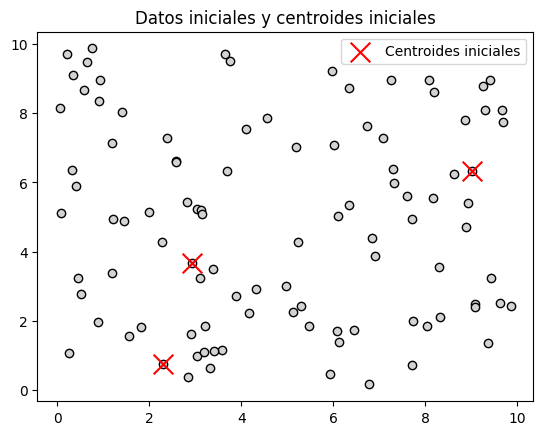

In [21]:
# --- Visualización inicial ---
plt.scatter(X[:, 0], X[:, 1], c='lightgrey', edgecolor='k')
plt.scatter(centroides[:, 0], centroides[:, 1], c='red', marker='x', s=200, label='Centroides iniciales')
plt.title("Datos iniciales y centroides iniciales")
plt.legend()
plt.show()

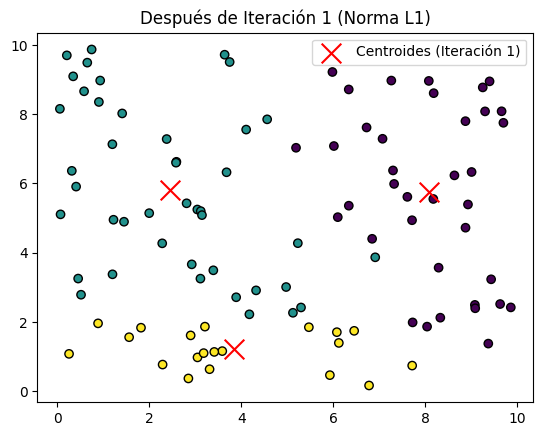

In [22]:
# --- Primera iteración ---
labels = []
for punto in X:
    distancias = [distancia(punto, centroide, norma) for centroide in centroides]
    labels.append(np.argmin(distancias))
labels = np.array(labels)

nuevos_centroides = np.array([
    X[labels == i].mean(axis=0) if len(X[labels == i]) > 0 else centroides[i]
    for i in range(k)
])

# --- Visualización tras 1ra iteración ---
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', edgecolor='k')
plt.scatter(nuevos_centroides[:, 0], nuevos_centroides[:, 1], c='red', marker='x', s=200, label='Centroides (Iteración 1)')
plt.title(f"Después de Iteración 1 (Norma {norma})")
plt.legend()
plt.show()

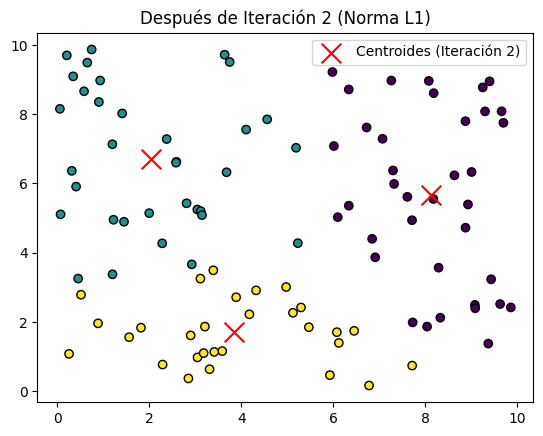

In [23]:
# --- Segunda iteración ---
centroides = nuevos_centroides
labels = []
for punto in X:
    distancias = [distancia(punto, centroide, norma) for centroide in centroides]
    labels.append(np.argmin(distancias))
labels = np.array(labels)

nuevos_centroides = np.array([
    X[labels == i].mean(axis=0) if len(X[labels == i]) > 0 else centroides[i]
    for i in range(k)
])

# --- Visualización tras 2da iteración ---
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', edgecolor='k')
plt.scatter(nuevos_centroides[:, 0], nuevos_centroides[:, 1], c='red', marker='x', s=200, label='Centroides (Iteración 2)')
plt.title(f"Después de Iteración 2 (Norma {norma})")
plt.legend()
plt.show()

In [24]:
# --- K-means manual ---
max_iter = 20

for _ in range(max_iter):
    # Asignar cada punto al centroide más cercano
    labels = []
    for punto in X:
        distancias = [distancia(punto, centroide, norma) for centroide in centroides]
        labels.append(np.argmin(distancias))
    labels = np.array(labels)

    # Actualizar centroides (promedio de puntos asignados)
    nuevos_centroides = np.array([
        X[labels == i].mean(axis=0) if len(X[labels == i]) > 0 else centroides[i]
        for i in range(k)
    ])

    # Ver si los centroides ya no cambian (convergencia)
    if np.allclose(centroides, nuevos_centroides, atol=1e-4):
        break

    centroides = nuevos_centroides

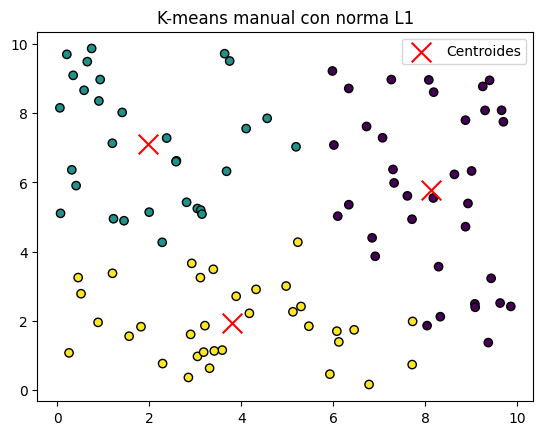

In [25]:
# --- Visualizar resultado ---
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', edgecolor='k')
plt.scatter(centroides[:, 0], centroides[:, 1], c='red', marker='x', s=200, label='Centroides')
plt.title(f"K-means manual con norma {norma}")
plt.legend()
plt.show()


# Referencias

https://es.statisticseasily.com/glossario/what-is-normed-vector-space/

https://es.wikipedia.org/wiki/Espacio_vectorial_normado

https://es.wikipedia.org/wiki/Historia_de_las_matem%C3%A1ticas

https://es.wikipedia.org/wiki/Norma_vectorial

https://www.aprendemachinelearning.com/k-means-en-python-paso-a-paso/